In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)

In [5]:
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


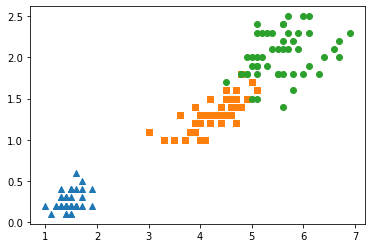

In [6]:
markers=['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
iris_scaled=StandardScaler().fit_transform(irisDF)

In [10]:
from sklearn.decomposition import PCA   # PCA에 넣으려면 우선 sTANDARD Scale 적용 필요!

In [11]:
pca=PCA(n_components=2)                 # Component 개수는 차원개수

In [12]:
pca.fit(iris_scaled)

PCA(n_components=2)

In [13]:
iris_pca = pca.transform(iris_scaled)
irisDF_pca=pd.DataFrame(iris_pca, columns=['pca_component_1','pca_component_2'])
irisDF_pca['target']=iris.target

In [14]:
print(iris_pca.shape)

(150, 2)


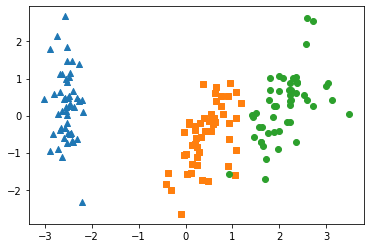

In [15]:
markers=['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

In [18]:
df=pd.read_excel('credit_card_clients.xls', sheet_nmae='Data', header=1)
print(df.shape)

(30000, 25)


In [19]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
#df=df.drop(df.index[0])
df.drop("ID", axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

In [32]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

In [33]:
y_target=df['default']
x_features=df.drop('default', axis=1)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
x_features.head(3)
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   EDUCATION  30000 non-null  int64
 2   MARRIAGE   30000 non-null  int64
 3   AGE        30000 non-null  int64
 4   PAY_1      30000 non-null  int64
 5   PAY_2      30000 non-null  int64
 6   PAY_3      30000 non-null  int64
 7   PAY_4      30000 non-null  int64
 8   PAY_5      30000 non-null  int64
 9   PAY_6      30000 non-null  int64
 10  BILL_AMT1  30000 non-null  int64
 11  BILL_AMT2  30000 non-null  int64
 12  BILL_AMT3  30000 non-null  int64
 13  BILL_AMT4  30000 non-null  int64
 14  BILL_AMT5  30000 non-null  int64
 15  BILL_AMT6  30000 non-null  int64
 16  PAY_AMT1   30000 non-null  int64
 17  PAY_AMT2   30000 non-null  int64
 18  PAY_AMT3   30000 non-null  int64
 19  PAY_AMT4   30000 non-null  int64
 20  PAY_AMT5   30000 non-null  int64
 21  PAY_AMT6   3

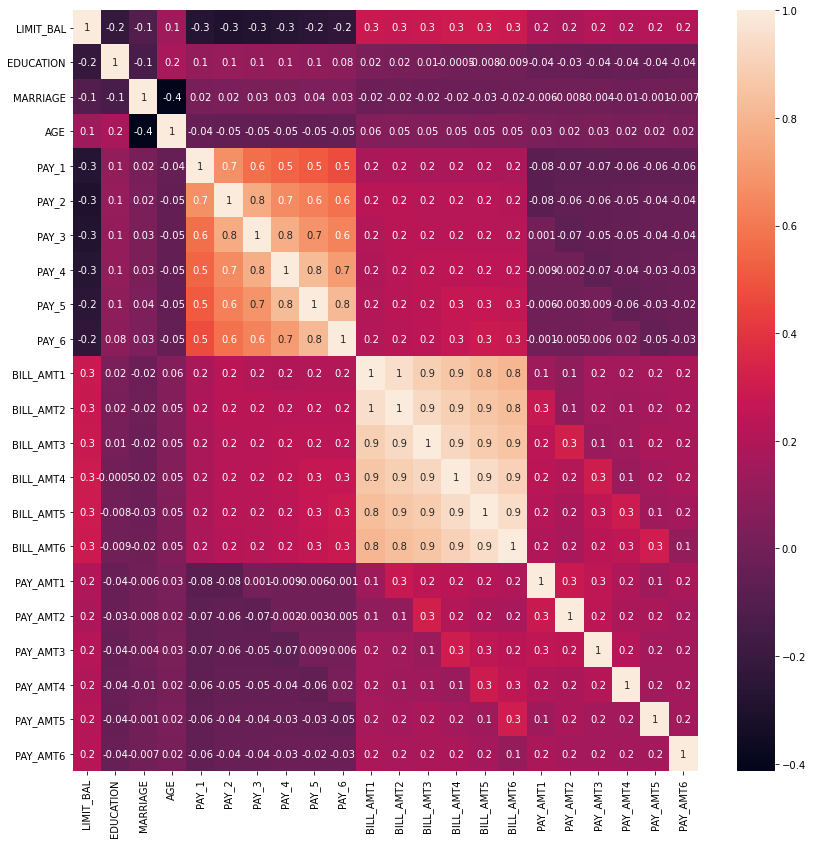

In [37]:
corr=x_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
import seaborn as sns
corr=x_features.corr()

In [40]:
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
x_features[cols_bill]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [41]:
scaler=StandardScaler()
df_cols_scaled =  StandardScaler().fit_transform(x_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)       # 최대, 최소 분산을 보여줌! 

[0.90555253 0.0509867 ]


In [56]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier          # PCA가지고 random forest를 해본것!
from sklearn.model_selection import cross_val_score          #교차검증하여 얻어오는 값

In [51]:
rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, x_features, y_target, scoring='accuracy', cv=3)

In [52]:
print('CV=3, fold', scores)

CV=3, fold [0.8074 0.8194 0.8205]


In [53]:
print('mean_accuracy:{0:.4f}'.format(np.mean(scores)))

mean_accuracy:0.8158


In [54]:
df_cols_scaled6 =  StandardScaler().fit_transform(x_features)
pca6=PCA(n_components=6)
df_pca=pca6.fit_transform(df_cols_scaled6)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

In [55]:
print(scores_pca)
print(np.mean(scores_pca))

[0.7904 0.796  0.801 ]
0.7958
